In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


In [4]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084


In [5]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with the parameters
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Fit the model to the scaled data
dbscan.fit(df_scaled)

# Assign cluster labels to the data points
df['Cluster'] = dbscan.labels_

# Display the first few rows with cluster labels
print(df.head())

   AnnualIncome  SpendingScore  Cluster
0          15.0             39        0
1          15.5             42        0
2          16.0             45        0
3          16.5             48        0
4          17.0             51        0


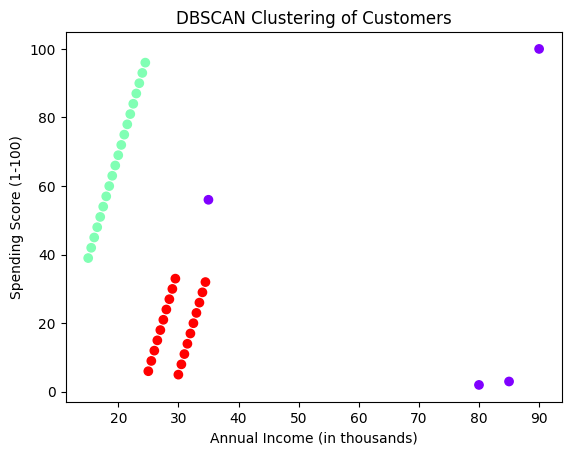

In [6]:
# Plot the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

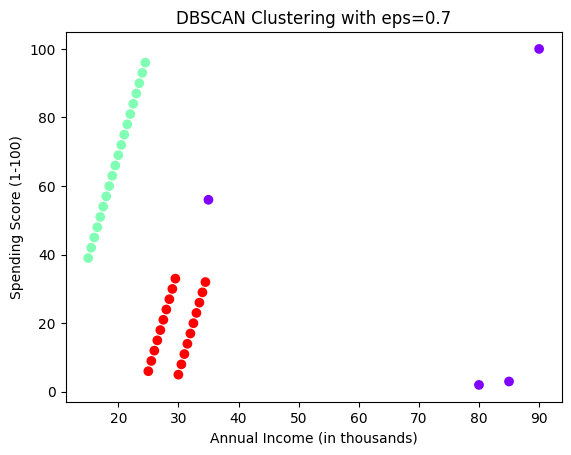

In [18]:
# Increase eps to 0.7 and refit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(df_scaled)
df['Cluster'] = dbscan.labels_

# Plot the updated clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering with eps=0.7')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

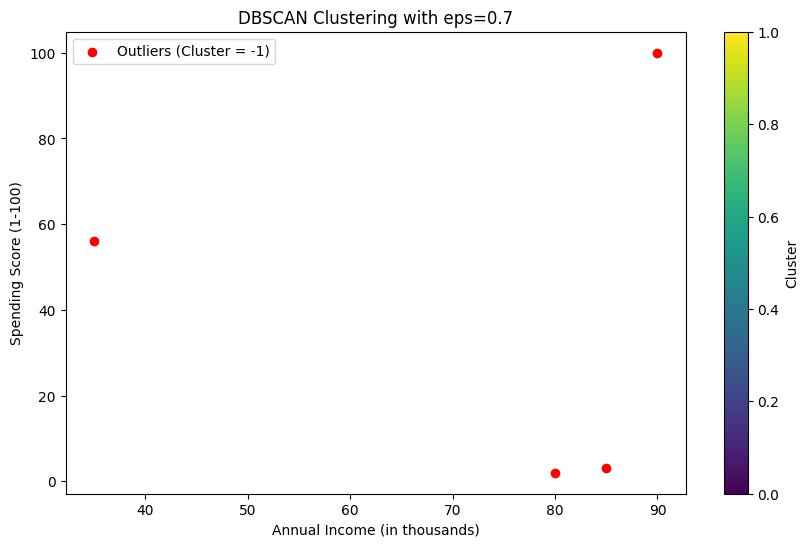

In [ ]:
outliers = df[df['Cluster'] == -1]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Wyplotowanie punktów z Cluster == -1
plt.scatter(outliers['AnnualIncome'], outliers['SpendingScore'], 
            color='red', label='Outliers (Cluster = -1)')


#inliers = df[df['Cluster'] != -1]
#plt.scatter(inliers['AnnualIncome'], inliers['SpendingScore'], 
 #           c=inliers['Cluster'], cmap='rainbow', label='Clustered Points')

plt.title('DBSCAN Clustering with eps=0.7')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In [20]:
print(df[df['Cluster']== -1])

    AnnualIncome  SpendingScore  Cluster
40          35.0             56       -1
41          80.0              2       -1
42          85.0              3       -1
43          90.0            100       -1
